In [4]:
import json
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nlp = spacy.load("pl_core_news_lg")

In [8]:
translation = ['park rozrywki',
               'zwierzęta',
               'ławka',
               'budynek',
               'zamek',
                'jaskinia',
              'kościół',
              'miasto',
              'krzyż',
              'kultura',  # kultura
              'jedzenie',
               'chodnik',
              'las',
              'meble',
              'trawa',
              'cmentarz',
              'jezioro',
              'kopalnia',
              'pomnik',
              'pojazd',  # pojazd
               'góry',
               'muzeum',
               'skansen',
               'park',
               'osoba',
               'rośliny',
               'rezerwuar',
               'rzeka',
               'droga',
               'skały',
               'śnieg',
               'sport',
               'obiekt sportowy',
               'schody',
               'drzewa',
               'statek',
               'okna'
              ]

In [5]:
with open('data/opisy.json') as f:
    dict_txt = json.load(f)

In [6]:
def get_topics_in_text(opis_dict):
    df = pd.DataFrame()
    for i in range(len(list(dict_txt.keys()))):
        for key, value in dict_txt[list(dict_txt.keys())[i]].items():
            doc = nlp(value)
            list_out = [(t.orth_, t.lemma_, key) for t in doc]
            df = df.append(pd.DataFrame(list_out, columns=['forma','lemat', 'timestamp']))
    df['is_in_topics'] = df['lemat'].apply(lambda x: x in translation)
    return df.reset_index(drop=True)
    

In [9]:
df = get_topics_in_text(dict_txt)

In [10]:
df[df['is_in_topics'] == True]['lemat'].value_counts()

kościół     157
budynek      83
miasto       81
park         52
cmentarz     29
muzeum       25
kopalnia     21
droga        20
zamek        20
las          19
rzeka        18
góry         12
osoba        12
pomnik       11
kultura       7
skansen       6
jezioro       5
krzyż         4
sport         3
jaskinia      3
jedzenie      1
Name: lemat, dtype: int64

<AxesSubplot:ylabel='Frequency'>

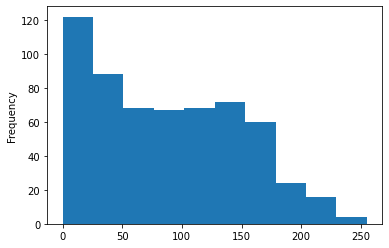

In [11]:
df[df['is_in_topics']==True]['timestamp'].astype('float').plot.hist()

## Wordclouds

In [12]:
from wordcloud import WordCloud

In [14]:
stopwords_ = ['ach', 'aj', 'albo', 'bardzo', 'bez', 'bo', 'być', 'ci', 'cię', 'ciebie', 'co', 'czy', 'daleko', 'dla', 'dlaczego', 'dlatego', 'do', 'dobrze', 'dokąd', 'dość', 'dużo', 'dwa', 'dwaj', 'dwie', 'dwoje', 'dziś', 'dzisiaj', 'gdyby', 'gdzie', 'go', 'ich', 'ile', 'im', 'inny', 'ja', 'ją', 'jak', 'jakby', 'jaki', 'je', 'jeden', 'jedna', 'jedno', 'jego', 'jej', 'jemu', 'jeśli', 'jest', 'jestem', 'jeżeli ', 'już', 'każdy', 'kiedy', 'kierunku', 'kto', 'ku', 'lub', 'ma', 'mają', 'mam', 'mi', 'mną', 'mnie', 'moi', 'mój', 'moja', 'moje', 'może', 'mu', 'my', 'na', 'nam', 'nami', 'nas', 'nasi', 'nasz', 'nasza', 'nasze', 'natychmiast', 'nią', 'nic', 'nich', 'nie', 'niego', 'niej', 'niemu', 'nigdy', 'nim', 'nimi', 'niż', 'obok', 'od', 'około', 'on', 'ona', 'one', 'oni', 'ono', 'owszem', 'po \tpod', 'ponieważ', 'przed', 'przedtem', 'są', 'sam', 'sama', 'się', 'skąd', 'tak', 'taki', 'tam', 'ten', 'to', 'tobą', 'tobie', 'tu', 'tutaj', 'twoi', 'twój', 'twoja', 'twoje', 'ty', 'wam', 'wami', 'was', 'wasi', 'wasz', 'wasza', 'wasze', 'we', 'więc', 'wszystko', 'wtedy', 'wy', 'żaden', 'zawsze', 'że']

In [22]:
freqs = dict(df['lemat'].value_counts())
freqs_good = dict(df[df['is_in_topics'] == True]['lemat'].value_counts())

In [23]:
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords_).generate_from_frequencies(freqs_good)

(-0.5, 799.5, 399.5, -0.5)

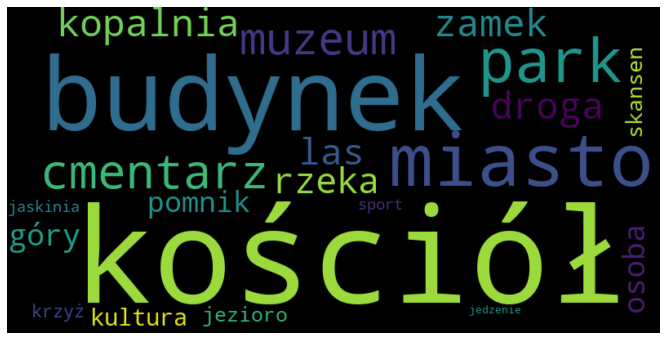

In [24]:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")